In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

data_list = []
for i in range(7):
    data = pd.read_csv('new_players_' + str(15 + i) + '.csv').set_index('sofifa_id')
    data_list.append(data)

In [201]:
ndata_list = []
for i in range(6):
    next_yr_value = data_list[i+1]['value_eur']
    #ndata_list.append(data_list[i].join(next_yr_value, how='left', rsuffix='_next').fillna(0))
    ndata_list.append(data_list[i])
    ndata_list[i]['value_eur_next'].fillna(0)

In [202]:
# get rid of cases where value euro next is 0 and value euro is 0 and get rid of goalkeepers
ndata_list2 = []
for i, j in enumerate(ndata_list):
    ndata_list2.append(j.where(j['value_eur_next']!=0.0).dropna(how='all'))
    ndata_list2[i] = ndata_list2[i].where(ndata_list2[i]['team_position']!='GK').dropna(how='all')

In [203]:
for i in range(len(ndata_list2)):
    ndata_list2[i].insert(8,'year',np.ones(len(ndata_list2[i]))*i)

In [204]:
leagues = ndata_list2[4]['league_name'].unique()
print(leagues,len(leagues))

['Italian Serie A' 'Spain Primera Division' 'French Ligue 1'
 'English Premier League' 'German 1. Bundesliga'
 'Japanese J. League Division 1' 'USA Major League Soccer'
 'Turkish Süper Lig' 'Chinese Super League' 'Portuguese Liga ZON SAGRES'
 'Russian Premier League' 'Campeonato Brasileiro Série A'
 'Holland Eredivisie' 'Ukrainian Premier League' '0'
 'Argentina Primera División' 'Mexican Liga MX' 'Greek Super League'
 'Belgian Jupiler Pro League' 'German 2. Bundesliga'
 'Spanish Segunda División' 'Colombian Liga Postobón'
 'Saudi Abdul L. Jameel League' 'Austrian Football Bundesliga'
 'English League Championship' 'Scottish Premiership' 'Swiss Super League'
 'Chilian Campeonato Nacional' 'Danish Superliga'
 'Czech Republic Gambrinus Liga' 'Australian Hyundai A-League'
 'Croatian Prva HNL' 'Italian Serie B' 'French Ligue 2'
 'South African Premier Division' 'Polish T-Mobile Ekstraklasa'
 'English League One' 'Korean K League Classic' 'Swedish Allsvenskan'
 'Norwegian Eliteserien' 'Germ

In [205]:
tier1 = ['English Premier League','Spain Primera Division','Italian Serie A',
        'German 1. Bundesliga', 'French Ligue 1', 'Russian Premier League',
        'Portuguese Liga ZON SAGRES', 'Belgian Jupiler Pro League',
        'Holland Eredivisie', 'USA Major League Soccer']

tier2 = ['Turkish Süper Lig','Mexican Liga MX','Campeonato Brasileiro Série A',
        'Scottish Premiership', 'Argentina Primera División',
        'Austrian Football Bundesliga', 'Ukrainian Premier League',
        'Danish Superliga', 'Swiss Super League', 'Rest of World']

tier3 = ['Croatian Prva HNL','English League Championship', 'Greek Super League', 
        'Swedish Allsvenskan', 'Czech Republic Gambrinus Liga',
        'Saudi Abdul L. Jameel League', 'Polish T-Mobile Ekstraklasa',
        'Chinese Super League', 'Colombian Liga Postobón',
        'Japanese J. League Division 1']

tier4 = ['Norwegian Eliteserien','Romanian Liga I','0',
        'German 2. Bundesliga','Spanish Segunda División', 
        'Chilian Campeonato Nacional','Australian Hyundai A-League', 
        'Italian Serie B', 'French Ligue 2',
        'South African Premier Division', 
        'English League One', 'Korean K League Classic',
        'German 3. Bundesliga', 'English League Two',
        'Finnish Veikkausliiga', 'Rep. Ireland Airtricity League']


In [206]:
ranking = [[],[],[],[],[],[]]
for j in range(6):
    for i in ndata_list2[j]['league_name']:
        if i in tier1:
            ranking[j].append(1)
        elif i in tier2:
            ranking[j].append(2)
        elif i in tier3:
            ranking[j].append(3)
        elif i in tier4:
            ranking[j].append(4)
        else:
            ranking[j].append(5)

In [207]:
for i in range(len(ndata_list2)):
    ndata_list2[i].insert(10,'league_ranking',ranking[i])

In [208]:
# Below is the set of columns we care about

features = ['age'
            ,'height_cm'
           ,'weight_kg'
           ,'overall'
           ,'potential'
           ,'pace'
           ,'shooting'
           ,'passing'
           ,'defending'
           ,'dribbling'
           ,'physic'
           ,'year'
           ,'league_ranking']

filtered_data = []
ys = []
for d in ndata_list2:
    filtered_data.append(d[features].fillna(0))
    ys.append(d['value_eur_next'].fillna(0))
filtered_data[0]

,age,height_cm,weight_kg,overall,potential,pace,shooting,passing,defending,dribbling,physic,year,league_ranking
sofifa_id,,,,,,,,,,,,,
158023,27.0,169.0,67.0,93.0,95.0,93.0,89.0,86.0,27.0,96.0,63.0,0.0,1
20801,29.0,185.0,80.0,92.0,92.0,93.0,93.0,81.0,32.0,91.0,79.0,0.0,1
9014,30.0,180.0,80.0,90.0,90.0,93.0,86.0,83.0,32.0,92.0,64.0,0.0,1
41236,32.0,195.0,95.0,90.0,90.0,76.0,91.0,81.0,34.0,86.0,86.0,0.0,1
176580,27.0,181.0,81.0,89.0,91.0,83.0,87.0,79.0,42.0,88.0,79.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222997,18.0,174.0,70.0,42.0,54.0,46.0,32.0,42.0,32.0,45.0,47.0,0.0,2
220806,17.0,187.0,81.0,41.0,61.0,66.0,25.0,29.0,39.0,30.0,53.0,0.0,4
225509,17.0,178.0,57.0,41.0,50.0,64.0,41.0,27.0,27.0,35.0,41.0,0.0,4


In [209]:
n = len(filtered_data[0])
t1 = int(0.65*n)
t2 = int(0.8*n)
index_shuffle = np.array(filtered_data[0].index)
np.random.shuffle(index_shuffle)

train_x = filtered_data[0].loc[index_shuffle[0:t1]]
validate_x = filtered_data[0].loc[index_shuffle[t1:t2]]
test_x = filtered_data[0].loc[index_shuffle[t2:n]]

train_y = ys[0].loc[index_shuffle[0:t1]]
validate_y = ys[0].loc[index_shuffle[t1:t2]]
test_y = ys[0].loc[index_shuffle[t2:n]]
train_log_y = np.log(train_y)
validate_log_y = np.log(validate_y)
test_log_y = np.log(test_y)
train_log_y.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
validate_log_y.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
test_log_y.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

In [210]:
for i in range(len(filtered_data)):
    n = len(filtered_data[i])
    t1 = int(0.65*n)
    t2 = int(0.8*n)
    index_shuffle = np.array(filtered_data[i].index)
    np.random.shuffle(index_shuffle)

    train_x_i = filtered_data[i].loc[index_shuffle[0:t1]]
    validate_x_i = filtered_data[i].loc[index_shuffle[t1:t2]]
    test_x_i = filtered_data[i].loc[index_shuffle[t2:n]]

    train_y_i = ys[i].loc[index_shuffle[0:t1]]
    validate_y_i = ys[i].loc[index_shuffle[t1:t2]]
    test_y_i = ys[i].loc[index_shuffle[t2:n]]
    
    train_log_y_i = np.log(train_y_i)
    validate_log_y_i = np.log(validate_y_i)
    test_log_y_i = np.log(test_y_i)
    train_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    validate_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    test_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    if i == 0:
        train_x = train_x_i
        validate_x = validate_x_i
        test_x = test_x_i
        train_y = train_y_i
        validate_y = validate_y_i
        test_y = test_y_i        
        train_log_y = train_log_y_i
        validate_log_y = validate_log_y_i
        test_log_y = test_log_y_i  
    else:
        train_x = train_x.append(train_x_i)
        validate_x = validate_x.append(validate_x_i)
        test_x = test_x.append(test_x_i)
        train_y = train_y.append(train_y_i)
        validate_y = validate_y.append(validate_y_i)
        test_y = test_y.append(test_y_i)        
        train_log_y = train_log_y.append(train_log_y_i)
        validate_log_y = validate_log_y.append(validate_log_y_i)
        test_log_y = test_log_y.append(test_log_y_i)

In [211]:
U,S,V = np.linalg.svd(train_x,full_matrices = False)

In [212]:
train_x

,age,height_cm,weight_kg,overall,potential,pace,shooting,passing,defending,dribbling,physic,year,league_ranking
sofifa_id,,,,,,,,,,,,,
220051,21.0,185.0,78.0,64.0,68.0,70.0,47.0,63.0,60.0,61.0,70.0,0.0,4
203486,21.0,174.0,69.0,76.0,84.0,73.0,73.0,76.0,32.0,76.0,63.0,0.0,1
215531,21.0,177.0,72.0,68.0,74.0,74.0,65.0,70.0,53.0,71.0,67.0,0.0,1
190502,24.0,183.0,76.0,77.0,82.0,72.0,70.0,78.0,73.0,74.0,76.0,0.0,1
224222,22.0,183.0,80.0,50.0,55.0,68.0,47.0,53.0,35.0,52.0,57.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200928,26.0,190.0,75.0,65.0,67.0,54.0,60.0,64.0,60.0,60.0,75.0,5.0,4
252185,18.0,196.0,94.0,59.0,78.0,52.0,36.0,41.0,56.0,44.0,70.0,5.0,4
244771,18.0,187.0,83.0,62.0,81.0,61.0,32.0,37.0,61.0,36.0,73.0,5.0,3


Text(0.5, 1.0, 'Normalized Eigenvalues for Outfielders')

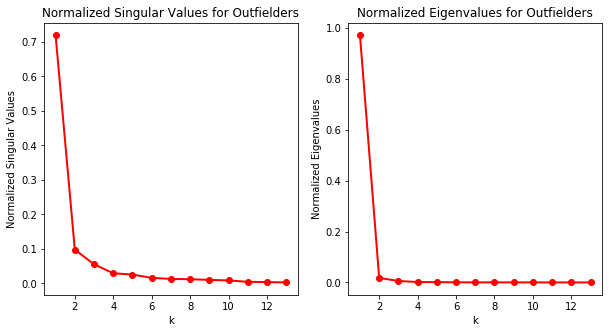

In [213]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(range(1,len(S)+1), S/np.sum(S), 'ro-', linewidth=2)
ax[0].set_ylabel('Normalized Singular Values')
ax[0].set_xlabel('k')
ax[0].set_title('Normalized Singular Values for Outfielders')
eigvals = S**2 / np.sum(S**2)
ax[1].plot(range(1,len(S)+1), eigvals, 'ro-', linewidth=2)
ax[1].set_ylabel('Normalized Eigenvalues')
ax[1].set_xlabel('k')
ax[1].set_title('Normalized Eigenvalues for Outfielders')

Text(0.5, 1.0, 'Choose k based on constant (c)')

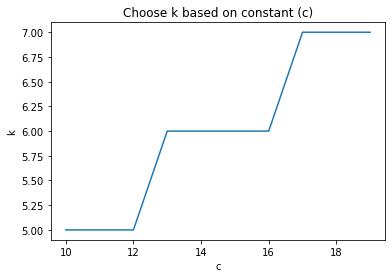

In [214]:
c_range = range(10,20)
c_list = np.zeros(len(c_range))
for c in range(len(c_range)):
    for k in range(len(S)):
        if np.sum(S[:k]) >= np.sum(S[k:])*c_range[c]:
            c_list[c] = k
            break
plt.plot(c_range,c_list)
plt.xlabel('c')
plt.ylabel('k')
plt.title('Choose k based on constant (c)')

In [215]:
for f in range(5,8):
    train_pca = train_x@V[0:f].T
    validate_pca = validate_x@V[0:f].T

    model = LinearRegression()
    model.fit(train_pca,train_y)
    pred = model.coef_.reshape(f,1)

    pred_vector = validate_pca@pred
    print(f, 'abs:', np.mean(np.abs(validate_y - (np.array(pred_vector).reshape(len(pred_vector),)))),
          'mse:', np.mean((validate_y - np.array(pred_vector).reshape(len(pred_vector),))**2))

5 abs: 71299346.36391258 mse: 5105229328163885.0
6 abs: 42059903.15341284 mse: 1784192727366661.2
7 abs: 41601125.764455736 mse: 1745707890491816.2


Validation chooses k = 7

Text(0, 0.5, 'True Market Value')

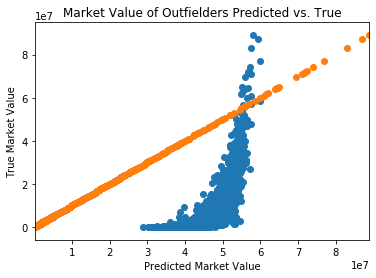

In [216]:
f = 7
train_pca = train_x@V[0:f].T
test_pca = test_x@V[0:f].T

model = LinearRegression()
model.fit(train_pca,train_y)
pred = model.coef_.reshape(f,1)

pred_vector = test_pca@pred
plt.xlim([np.min(np.array([np.min(pred_vector)[0],np.min(test_y)])),np.max(np.array([np.max(test_y),np.max(pred_vector)[0]]))])
plt.scatter(pred_vector,test_y)
plt.scatter(test_y,test_y)
plt.title('Market Value of Outfielders Predicted vs. True')
plt.xlabel('Predicted Market Value')
plt.ylabel('True Market Value')

In [217]:
np.min(pred_vector)[0]

28958322.92997255

Absolute Error:

In [218]:
np.mean(np.abs(test_y - (np.array(pred_vector).reshape(len(pred_vector),))))

41567601.19898374

Text(0, 0.5, 'Absolute Error')

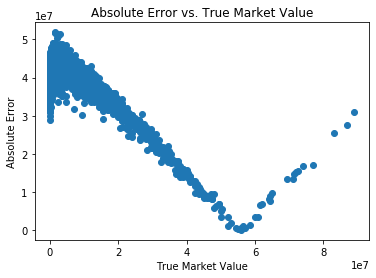

In [219]:
plt.scatter(test_y,np.abs(test_y - (np.array(pred_vector).reshape(len(pred_vector),))))
plt.title('Absolute Error vs. True Market Value')
plt.xlabel('True Market Value')
plt.ylabel('Absolute Error')

MSE Error:

In [220]:
np.mean((test_y - np.array(pred_vector).reshape(len(pred_vector),))**2)

1743681124597226.2

Text(0, 0.5, 'Mean Squared Error')

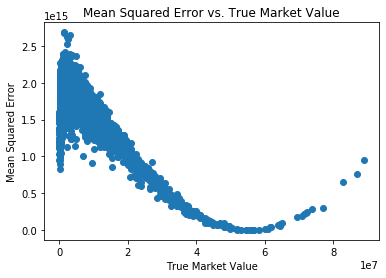

In [221]:
plt.scatter(test_y,(test_y - (np.array(pred_vector).reshape(len(pred_vector),)))**2)
plt.title('Mean Squared Error vs. True Market Value')
plt.xlabel('True Market Value')
plt.ylabel('Mean Squared Error')

In [222]:
for f in range(5,8):
    train_pca = train_x@V[0:f].T
    validate_pca = validate_x@V[0:f].T

    model = LinearRegression()
    model.fit(train_pca,train_log_y)
    pred = model.coef_.reshape(f,1)

    pred_vector = validate_pca@pred
    print(f, 'abs:', np.mean(np.abs(validate_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),)))),
          'mse:', np.mean((validate_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),)))**2))

5 abs: 34148456720.94519 mse: 3.940821977981622e+21
6 abs: 1144261.0302126987 mse: 7616594393930.164
7 abs: 1101832.3677430411 mse: 6780404527567.006


Validation choose k = 7

Text(0.5, 1.0, 'Log-Market Value of Outfielders Predicted vs. True')

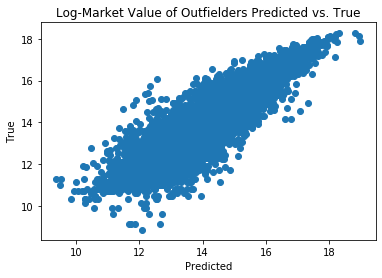

In [223]:
f = 7
train_pca = train_x@V[0:f].T
test_pca = test_x@V[0:f].T

model = LinearRegression()
model.fit(train_pca,train_log_y)
pred = model.coef_.reshape(f,1)

pred_vector = test_pca@pred
plt.scatter(pred_vector,test_log_y)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Log-Market Value of Outfielders Predicted vs. True')

Text(0.5, 0, 'Predicted Market Value')

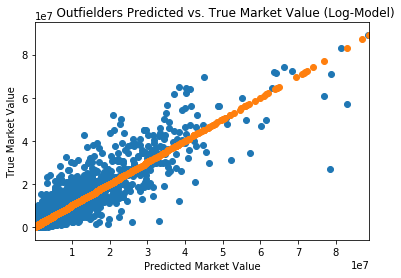

In [224]:
plt.xlim([np.min(np.array([np.min(pred_vector)[0],np.min(test_y)])),np.max(np.array([np.max(test_y),np.max(pred_vector)[0]]))])
plt.scatter(np.exp(pred_vector),test_y)
plt.scatter(test_y,test_y)
plt.title('            Outfielders Predicted vs. True Market Value (Log-Model)')
plt.ylabel('True Market Value')
plt.xlabel('Predicted Market Value')

Absolute Error:

In [225]:
np.mean(np.abs(test_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),))))

1110180.988932079

Text(0, 0.5, 'Absolute Error')

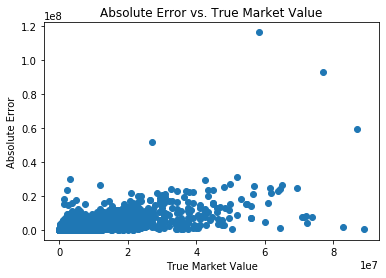

In [226]:
plt.scatter(test_y,np.abs(test_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),))))
plt.title('Absolute Error vs. True Market Value')
plt.xlabel('True Market Value')
plt.ylabel('Absolute Error')

MSE:

In [227]:
np.mean((test_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),)))**2)

7486615386076.514

Text(0, 0.5, 'Mean Squared Error')

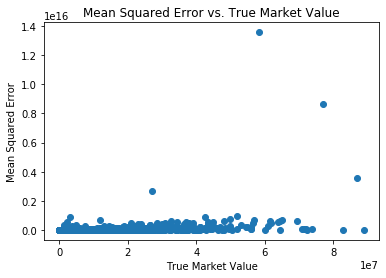

In [228]:
plt.scatter(test_y,(test_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),)))**2)
plt.title('Mean Squared Error vs. True Market Value')
plt.xlabel('True Market Value')
plt.ylabel('Mean Squared Error')

In [229]:
# get rid of cases where value euro next is 0 and value euro is 0 and get rid of goalkeepers
ndata_list3 = []
for i, j in enumerate(ndata_list):
    ndata_list3.append(j.where(j['value_eur_next']!=0.0).dropna(how='all'))
    ndata_list3[i] = ndata_list3[i].where(ndata_list3[i]['team_position']=='GK').dropna(how='all')

In [230]:
for i in range(len(ndata_list3)):
    ndata_list3[i].insert(8,'year',np.ones(len(ndata_list3[i]))*i)

In [231]:
rankinggk = [[],[],[],[],[],[]]
for j in range(6):
    for i in ndata_list3[j]['league_name']:
        if i in tier1:
            rankinggk[j].append(1)
        elif i in tier2:
            rankinggk[j].append(2)
        elif i in tier3:
            rankinggk[j].append(3)
        elif i in tier4:
            rankinggk[j].append(4)
        else:
            rankinggk[j].append(5)

In [232]:
for i in range(len(ndata_list3)):
    ndata_list3[i].insert(10,'league_ranking',rankinggk[i])

In [233]:
# Below is the set of columns we care about


features = ['age'
            ,'height_cm'
           ,'weight_kg'
           ,'overall'
           ,'potential'
           ,'gk_diving'
           ,'gk_reflexes'
           ,'gk_handling'
           ,'gk_kicking'
           ,'gk_speed'
           ,'gk_positioning'
           ,'year'
           ,'league_ranking']

filtered_data = []
ys = []
for d in ndata_list3:
    filtered_data.append(d[features].fillna(0))
    ys.append(d['value_eur_next'].fillna(0))
filtered_data[0]

,age,height_cm,weight_kg,overall,potential,gk_diving,gk_reflexes,gk_handling,gk_kicking,gk_speed,gk_positioning,year,league_ranking
sofifa_id,,,,,,,,,,,,,
167495,28.0,193.0,92.0,90.0,90.0,87.0,86.0,85.0,92.0,60.0,90.0,0.0,1
192119,22.0,199.0,88.0,86.0,90.0,84.0,88.0,87.0,69.0,49.0,86.0,0.0,1
167948,27.0,188.0,78.0,85.0,86.0,86.0,88.0,81.0,71.0,64.0,81.0,0.0,1
168435,27.0,192.0,80.0,84.0,85.0,85.0,87.0,79.0,73.0,51.0,84.0,0.0,1
5479,33.0,185.0,84.0,84.0,84.0,87.0,88.0,79.0,67.0,64.0,79.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212763,19.0,179.0,76.0,53.0,64.0,54.0,55.0,52.0,49.0,51.0,52.0,0.0,4
201354,21.0,186.0,81.0,53.0,62.0,50.0,58.0,50.0,48.0,46.0,52.0,0.0,4
222070,23.0,191.0,92.0,51.0,58.0,56.0,55.0,49.0,52.0,44.0,43.0,0.0,1


In [234]:
for i in range(len(filtered_data)):
    n = len(filtered_data[i])
    t1 = int(0.65*n)
    t2 = int(0.8*n)
    index_shuffle = np.array(filtered_data[i].index)
    np.random.shuffle(index_shuffle)

    train_x_i = filtered_data[i].loc[index_shuffle[0:t1]]
    validate_x_i = filtered_data[i].loc[index_shuffle[t1:t2]]
    test_x_i = filtered_data[i].loc[index_shuffle[t2:n]]

    train_y_i = ys[i].loc[index_shuffle[0:t1]]
    validate_y_i = ys[i].loc[index_shuffle[t1:t2]]
    test_y_i = ys[i].loc[index_shuffle[t2:n]]
    
    train_log_y_i = np.log(train_y_i)
    validate_log_y_i = np.log(validate_y_i)
    test_log_y_i = np.log(test_y_i)
    train_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    validate_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    test_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    if i == 0:
        train_x = train_x_i
        validate_x = validate_x_i
        test_x = test_x_i
        train_y = train_y_i
        validate_y = validate_y_i
        test_y = test_y_i        
        train_log_y = train_log_y_i
        validate_log_y = validate_log_y_i
        test_log_y = test_log_y_i  
    else:
        train_x = train_x.append(train_x_i)
        validate_x = validate_x.append(validate_x_i)
        test_x = test_x.append(test_x_i)
        train_y = train_y.append(train_y_i)
        validate_y = validate_y.append(validate_y_i)
        test_y = test_y.append(test_y_i)        
        train_log_y = train_log_y.append(train_log_y_i)
        validate_log_y = validate_log_y.append(validate_log_y_i)
        test_log_y = test_log_y.append(test_log_y_i)

In [235]:
U,S,V = np.linalg.svd(train_x,full_matrices = False)

Text(0.5, 1.0, 'Normalized Eigenvalues vs. k')

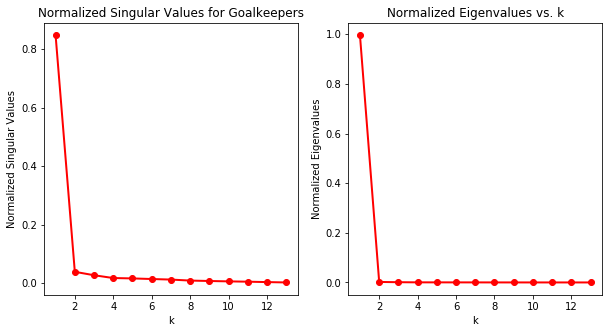

In [236]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(range(1,len(S)+1), S/np.sum(S), 'ro-', linewidth=2)
ax[0].set_ylabel('Normalized Singular Values')
ax[0].set_xlabel('k')
ax[0].set_title('Normalized Singular Values for Goalkeepers')
eigvals = S**2 / np.sum(S**2)
ax[1].plot(range(1,len(S)+1), eigvals, 'ro-', linewidth=2)
ax[1].set_ylabel('Normalized Eigenvalues')
ax[1].set_xlabel('k')
ax[1].set_title('Normalized Eigenvalues vs. k')

Text(0.5, 1.0, 'Choose k based on constant (c)')

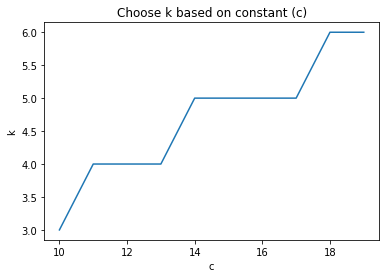

In [237]:
c_range = range(10,20)
c_list = np.zeros(len(c_range))
for c in range(len(c_range)):
    for k in range(len(S)):
        if np.sum(S[:k]) >= np.sum(S[k:])*c_range[c]:
            c_list[c] = k
            break
plt.plot(c_range,c_list)
plt.xlabel('c')
plt.ylabel('k')
plt.title('Choose k based on constant (c)')

In [238]:
for f in range(3,7):
    train_pca = train_x@V[0:f].T
    validate_pca = validate_x@V[0:f].T

    model = LinearRegression()
    model.fit(train_pca,train_y)
    pred = model.coef_.reshape(f,1)

    pred_vector = validate_pca@pred
    print(f, 'abs:', np.mean(np.abs(validate_y - (np.array(pred_vector).reshape(len(pred_vector),)))),
          'mse:', np.mean((validate_y - np.array(pred_vector).reshape(len(pred_vector),))**2))

3 abs: 64778297.990937665 mse: 4220937341892146.0
4 abs: 70901391.9043338 mse: 5050449023543589.0
5 abs: 72808144.58193544 mse: 5324031308588842.0
6 abs: 57938586.323248826 mse: 3379748251166037.0


We choose k = 6

Text(0, 0.5, 'True Market Value')

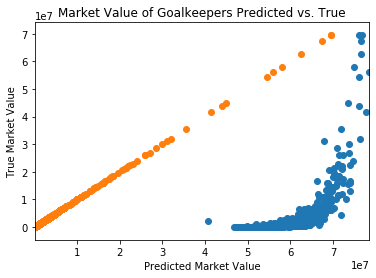

In [239]:
f = 6
train_pca = train_x@V[0:f].T
test_pca = test_x@V[0:f].T

model = LinearRegression()
model.fit(train_pca,train_y)
pred = model.coef_.reshape(f,1)

pred_vector = test_pca@pred
plt.xlim([np.min(np.array([np.min(pred_vector)[0],np.min(test_y)])),np.max(np.array([np.max(test_y),np.max(pred_vector)[0]]))])
plt.scatter(pred_vector,test_y)
plt.scatter(test_y,test_y)
plt.title('Market Value of Goalkeepers Predicted vs. True')
plt.xlabel('Predicted Market Value')
plt.ylabel('True Market Value')

Absolute Error:

In [240]:
np.mean(np.abs(test_y - (np.array(pred_vector).reshape(len(pred_vector),))))

57056421.56193446

Text(0, 0.5, 'Absolute Error')

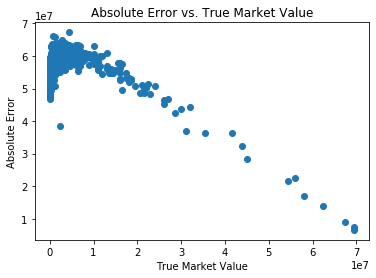

In [241]:
plt.scatter(test_y,np.abs(test_y - (np.array(pred_vector).reshape(len(pred_vector),))))
plt.title('Absolute Error vs. True Market Value')
plt.xlabel('True Market Value')
plt.ylabel('Absolute Error')

MSE:

In [242]:
np.mean((test_y - np.array(pred_vector).reshape(len(pred_vector),))**2)

3294336428333849.0

Text(0, 0.5, 'Mean Squared Error')

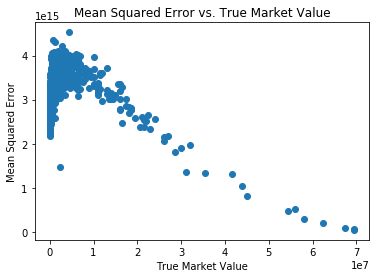

In [243]:
plt.scatter(test_y,(test_y - np.array(pred_vector).reshape(len(pred_vector),))**2)
plt.title('Mean Squared Error vs. True Market Value')
plt.xlabel('True Market Value')
plt.ylabel('Mean Squared Error')

In [244]:
for f in range(3,7):
    train_pca = train_x@V[0:f].T
    validate_pca = validate_x@V[0:f].T

    model = LinearRegression()
    model.fit(train_pca,train_log_y)
    pred = model.coef_.reshape(f,1)

    pred_vector = validate_pca@pred
    print(f, 'abs:', np.mean(np.abs(validate_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),)))),
          'mse:', np.mean((validate_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),)))**2))

3 abs: 7392141.317227557 mse: 332158775818723.75
4 abs: 63639898.66069818 mse: 1.6971017805592512e+16
5 abs: 142734558.03126982 mse: 9.391267341488838e+16
6 abs: 2659125.8299378236 mse: 30407409854320.883


We choose k = 6

Text(0.5, 1.0, 'Log-Market Value Goalkeepers Predicted vs. True')

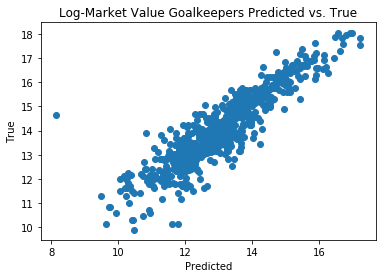

In [245]:
f = 6
train_pca = train_x@V[0:f].T
test_pca = test_x@V[0:f].T

model = LinearRegression()
model.fit(train_pca,train_log_y)
pred = model.coef_.reshape(f,1)

pred_vector = test_pca@pred
plt.scatter(pred_vector,test_log_y)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Log-Market Value Goalkeepers Predicted vs. True')

Text(0, 0.5, 'True Market Value')

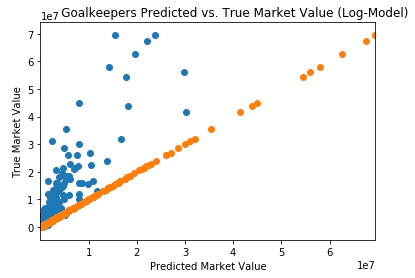

In [246]:
plt.xlim([np.min(np.array([np.min(pred_vector)[0],np.min(test_y)])),np.max(np.array([np.max(test_y),np.max(pred_vector)[0]]))])
plt.scatter(np.exp(pred_vector),test_y)
plt.scatter(test_y,test_y)
plt.title('              Goalkeepers Predicted vs. True Market Value (Log-Model)')
plt.xlabel('Predicted Market Value')
plt.ylabel('True Market Value')

Absolute Error:

In [247]:
np.mean(np.abs(test_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),))))

2753873.059230239

Text(0.5, 0, 'True Market Value')

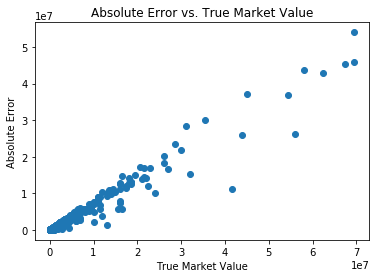

In [248]:
plt.scatter(test_y,(np.abs(test_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),)))))
plt.title('Absolute Error vs. True Market Value')
plt.ylabel('Absolute Error')
plt.xlabel('True Market Value')

MSE:

In [249]:
np.mean((test_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),)))**2)

42483258477726.35

Text(0, 0.5, 'Mean Squared Error')

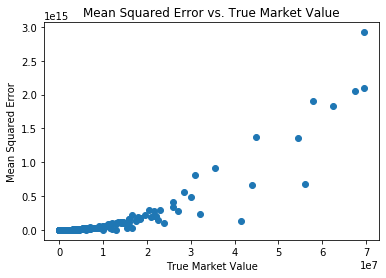

In [250]:
plt.scatter(test_y,((test_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),)))**2))
plt.title('Mean Squared Error vs. True Market Value')
plt.xlabel('True Market Value')
plt.ylabel('Mean Squared Error')

# Method #2: Bagging Decision Trees

### Non-Goalkeeper:

In [612]:
# Below is the set of columns we care about

features = ['age'
            ,'height_cm'
           ,'weight_kg'
           ,'overall'
           ,'potential'
           ,'pace'
           ,'shooting'
           ,'passing'
           ,'defending'
           ,'dribbling'
           ,'physic']

filtered_data = []
ys = []
for d in ndata_list2:
    filtered_data.append(d[features].fillna(0))
    ys.append(d['value_eur_next'].fillna(0))

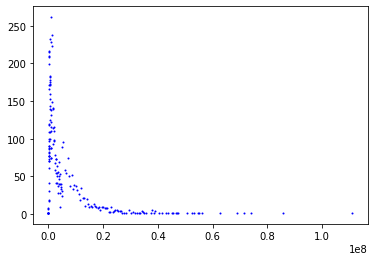

In [613]:
for i in np.unique(ys[0]):
    plt.scatter(i,np.sum(ys[0]==i),s=1,color='b')

(array([3662., 4512., 2590.]),
 array([        0,    600000,   2500000, 150000000]),
 <a list of 3 Patch objects>)

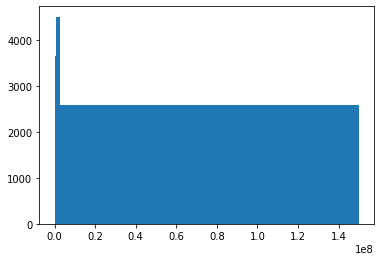

In [614]:
plt.hist(ys[1],bins=[0,600000,2500000,150000000])

(array([2991., 3512., 2937., 1324.]),
 array([        0,    500000,   1250000,   5000000, 150000000]),
 <a list of 4 Patch objects>)

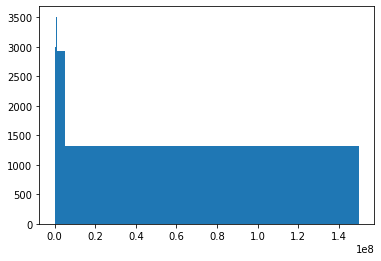

In [615]:
plt.hist(ys[1],bins=[0,500000,1250000,5000000,150000000])

(array([2317., 3007., 2850., 1991.,  599.]),
 array([        0,    400000,    900000,   2500000,  10000000, 150000000]),
 <a list of 5 Patch objects>)

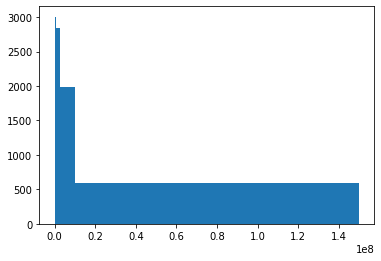

In [616]:
plt.hist(ys[1],bins=[0,400000,900000,2500000,10000000,150000000])

(array([1654., 2619., 2230., 2059., 1414.,  788.]),
 array([        0,    300000,    700000,   1250000,   3000000,   8000000,
        150000000]),
 <a list of 6 Patch objects>)

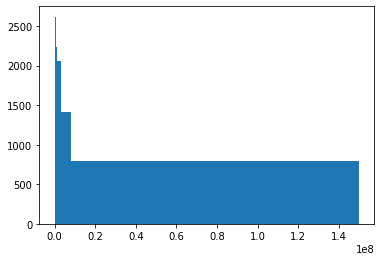

In [617]:
plt.hist(ys[1],bins=[0,300000,700000,1250000,3000000,8000000,150000000])

(array([1320., 2342., 2049., 1953., 1450., 1051.,  599.]),
 array([        0,    250000,    600000,   1000000,   2000000,   4000000,
         10000000, 150000000]),
 <a list of 7 Patch objects>)

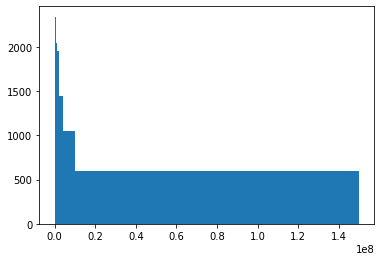

In [618]:
plt.hist(ys[1],bins=[0,250000,600000,1000000,2000000,4000000,10000000,150000000])

(array([ 924., 2067., 1834., 1678., 1500., 1282.,  880.,  599.]),
 array([        0,    200000,    500000,    800000,   1250000,   2250000,
          4500000,  10000000, 150000000]),
 <a list of 8 Patch objects>)

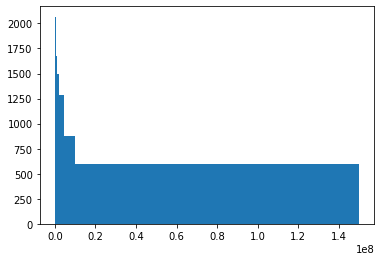

In [619]:
plt.hist(ys[1],bins=[0,200000,500000,800000,1250000,2250000,4500000,10000000,150000000])

In [620]:
# Below is the set of columns we care about

features = ['age'
            ,'height_cm'
           ,'weight_kg'
           ,'overall'
           ,'potential'
           ,'pace'
           ,'shooting'
           ,'passing'
           ,'defending'
           ,'dribbling'
           ,'physic'
           ,'year'
           ,'league_ranking']

filtered_data = []
ys = []
for d in ndata_list2:
    filtered_data.append(d[features].fillna(0))
    ys.append(d['value_eur_next'].fillna(0))
filtered_data[0]

,age,height_cm,weight_kg,overall,potential,pace,shooting,passing,defending,dribbling,physic,year,league_ranking
sofifa_id,,,,,,,,,,,,,
158023,27.0,169.0,67.0,93.0,95.0,93.0,89.0,86.0,27.0,96.0,63.0,0.0,1
20801,29.0,185.0,80.0,92.0,92.0,93.0,93.0,81.0,32.0,91.0,79.0,0.0,1
9014,30.0,180.0,80.0,90.0,90.0,93.0,86.0,83.0,32.0,92.0,64.0,0.0,1
41236,32.0,195.0,95.0,90.0,90.0,76.0,91.0,81.0,34.0,86.0,86.0,0.0,1
176580,27.0,181.0,81.0,89.0,91.0,83.0,87.0,79.0,42.0,88.0,79.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222997,18.0,174.0,70.0,42.0,54.0,46.0,32.0,42.0,32.0,45.0,47.0,0.0,2
220806,17.0,187.0,81.0,41.0,61.0,66.0,25.0,29.0,39.0,30.0,53.0,0.0,4
225509,17.0,178.0,57.0,41.0,50.0,64.0,41.0,27.0,27.0,35.0,41.0,0.0,4


In [621]:
num_bins = range(3,9)
bins_try= [[0,600000,2500000,150000000],[0,500000,1250000,5000000,150000000],[0,400000,900000,2500000,10000000,150000000],
           [0,300000,700000,1250000,3000000,8000000,150000000],[0,250000,600000,1000000,2000000,4000000,10000000,150000000],
          [0,200000,500000,800000,1250000,2250000,4500000,10000000,150000000]]

In [622]:
import copy
ys_bins1 = copy.deepcopy(ys) #3
ys_bins2 = copy.deepcopy(ys) #4
ys_bins3 = copy.deepcopy(ys) #5
ys_bins4 = copy.deepcopy(ys) #6
ys_bins5 = copy.deepcopy(ys) #7
ys_bins6 = copy.deepcopy(ys) #8
ys_bins = [ys_bins1,ys_bins2,ys_bins3,ys_bins4,ys_bins5,ys_bins6]
for h in range(len(ys_bins)):
    for i in range(len(ys_bins[h])):
        for j in ys_bins[h][i].index:
            for k, l in enumerate(bins_try[h]):
                if l >= ys_bins[h][i][j]:
                    ys_bins[h][i][j] = k
                    break

In [623]:
n = len(filtered_data[0])
t1 = int(0.65*n)
t2 = int(0.8*n)
index_shuffle = np.array(filtered_data[0].index)
np.random.shuffle(index_shuffle)

train_x = filtered_data[0].loc[index_shuffle[0:t1]]
validate_x = filtered_data[0].loc[index_shuffle[t1:t2]]
test_x = filtered_data[0].loc[index_shuffle[t2:n]]

train_y = ys_bins[0][0].loc[index_shuffle[0:t1]]
validate_y = ys_bins[0][0].loc[index_shuffle[t1:t2]]
test_y = ys_bins[0][0].loc[index_shuffle[t2:n]]

In [624]:
train_y = [[],[],[],[],[],[]]
validate_y = [[],[],[],[],[],[]]
test_y = [[],[],[],[],[],[]]
for i in range(len(filtered_data)):
    n = len(filtered_data[i])
    t1 = int(0.65*n)
    t2 = int(0.8*n)
    index_shuffle = np.array(filtered_data[i].index)
    np.random.shuffle(index_shuffle)

    train_x_i = filtered_data[i].loc[index_shuffle[0:t1]]
    validate_x_i = filtered_data[i].loc[index_shuffle[t1:t2]]
    test_x_i = filtered_data[i].loc[index_shuffle[t2:n]]
    if i == 0:
        train_x = train_x_i
        validate_x = validate_x_i
        test_x = test_x_i
    else:
        train_x = train_x.append(train_x_i)
        validate_x = validate_x.append(validate_x_i)
        test_x = test_x.append(test_x_i)
    for j in range(len(ys_bins)):
        train_y_i = ys_bins[j][i].loc[index_shuffle[0:t1]]
        validate_y_i = ys_bins[j][i].loc[index_shuffle[t1:t2]]
        test_y_i = ys_bins[j][i].loc[index_shuffle[t2:n]]
        if i == 0:
            train_y[j] = train_y_i
            validate_y[j] = validate_y_i
            test_y[j] = test_y_i
        else:
            train_y[j] = train_y[j].append(train_y_i)
            validate_y[j] = validate_y[j].append(validate_y_i)
            test_y[j] = test_y[j].append(test_y_i)

In [625]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_depth = range(3,16)
correct = [[],[],[],[],[],[]]
for h in range(len(ys_bins)):
    for i in tree_depth:
        decision_tree = DecisionTreeClassifier(max_depth = i, random_state = 314).fit(train_x,train_y[h])
        correct[h].append(np.sum(decision_tree.predict(validate_x)==validate_y[h])/len(validate_y[h]))
pd.DataFrame(data=np.array(correct), columns = np.array(tree_depth),index =num_bins)

,3,4,5,6,7,8,9,10,11,12,13,14,15
3,0.738418,0.765609,0.785031,0.788820,0.793273,0.787210,0.788157,0.785505,0.778399,0.775936,0.766082,0.760682,0.749218
4,0.679962,0.701184,0.714922,0.724586,0.728186,0.729133,0.732070,0.722596,0.722027,0.714353,0.707816,0.693794,0.688678
5,0.589578,0.647087,0.661677,0.675793,0.682331,0.681478,0.683089,0.676457,0.668309,0.667456,0.656750,0.643297,0.638939
6,0.520701,0.565135,0.583515,0.602653,0.602842,0.605969,0.608906,0.611085,0.603695,0.596968,0.585220,0.572904,0.563903
7,0.478825,0.531786,0.552440,0.562577,0.562482,0.574135,0.576504,0.578209,0.568735,0.562009,0.550734,0.541165,0.536618
8,0.420748,0.474372,0.500332,0.515964,0.528659,0.537470,0.532639,0.532449,0.528091,0.521364,0.516722,0.501563,0.491994


In [626]:
from sklearn.ensemble import BaggingClassifier
tree_depth = range(3,16)
correct = [[],[],[],[],[],[]]
for h in range(len(ys_bins)):
    for i in tree_depth:
        bag_class = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = i),n_estimators=1000,
                          max_samples = 20, random_state = 5)
        output = bag_class.fit(train_x,train_y[h])
        correct[h].append(np.sum(output.predict(validate_x)==validate_y[h])/len(validate_y[h]))
pd.DataFrame(data=np.array(correct), columns = np.array(tree_depth),index =num_bins)

,3,4,5,6,7,8,9,10,11,12,13,14,15
3,0.776599,0.775272,0.775367,0.775557,0.775557,0.775557,0.775557,0.775557,0.775557,0.775557,0.775557,0.775557,0.775557
4,0.699668,0.701374,0.701658,0.701468,0.701563,0.701563,0.701563,0.701563,0.701563,0.701563,0.701563,0.701563,0.701563
5,0.622738,0.622738,0.624443,0.624254,0.624254,0.624254,0.624254,0.624254,0.624254,0.624254,0.624254,0.624254,0.624254
6,0.548366,0.558503,0.559829,0.559261,0.558124,0.558408,0.558408,0.558408,0.558408,0.558408,0.558408,0.558408,0.558408
7,0.486405,0.494173,0.498153,0.497395,0.497205,0.497205,0.497205,0.497205,0.497205,0.497205,0.497205,0.497205,0.497205
8,0.429938,0.439886,0.445666,0.444150,0.445760,0.445192,0.445097,0.445097,0.445097,0.445097,0.445097,0.445097,0.445097


In [627]:
for i in range(5):
    print('from {} to {}:'.format(i+3,i+4),np.max(np.array(correct)[i,])-np.max(np.array(correct)[i + 1,]),'decrease')

from 3 to 4: 0.07494078635717671 decrease
from 4 to 5: 0.07721459024159172 decrease
from 5 to 6: 0.06461392704879199 decrease
from 6 to 7: 0.06167693036475608 decrease
from 7 to 8: 0.05239223117006159 decrease


Based on this output we choose to fit on 4 bins as we see a 7.7% decrease in accuracy from 4 to 5 bins in the best performing max tree depth while still giving us as many bins as we can get since we want as many as we can get while still predicting fairly accurately. At 4 bins we will choose a max depth of 5 as this produces the largest correct prediction rate at 70.166% for the valdiation set.

In [628]:
bag_class = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 5),n_estimators=1000,
                          max_samples = 20, random_state = 3)
output = bag_class.fit(train_x,train_y[1])
np.sum(output.predict(test_x)==test_y[1])/len(test_y[1])

0.7021669626998224

We attained a 70.22% correct prediction rate using 4 bins and max depth of 6

Text(0.5, 1.0, 'Histogram of the difference of expected - true value')

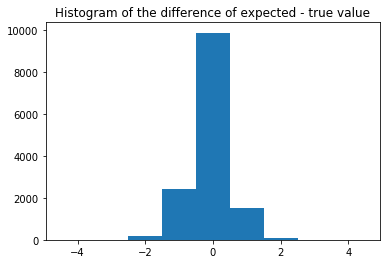

In [629]:
plt.hist(output.predict(test_x)-test_y[1],bins=[-4.5,-3.5,-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5,4.5])
plt.title('Histogram of the difference of expected - true value')

### Goalkeeper:

In [630]:
# Below is the set of columns we care about

features = ['age'
            ,'height_cm'
           ,'weight_kg'
           ,'overall'
           ,'potential'
           ,'gk_diving'
           ,'gk_reflexes'
           ,'gk_handling'
           ,'gk_kicking'
           ,'gk_speed'
           ,'gk_positioning']

filtered_data = []
ys = []
for d in ndata_list3:
    filtered_data.append(d[features].fillna(0))
    ys.append(d['value_eur_next'].fillna(0))
filtered_data[0]

,age,height_cm,weight_kg,overall,potential,gk_diving,gk_reflexes,gk_handling,gk_kicking,gk_speed,gk_positioning
sofifa_id,,,,,,,,,,,
167495,28.0,193.0,92.0,90.0,90.0,87.0,86.0,85.0,92.0,60.0,90.0
192119,22.0,199.0,88.0,86.0,90.0,84.0,88.0,87.0,69.0,49.0,86.0
167948,27.0,188.0,78.0,85.0,86.0,86.0,88.0,81.0,71.0,64.0,81.0
168435,27.0,192.0,80.0,84.0,85.0,85.0,87.0,79.0,73.0,51.0,84.0
5479,33.0,185.0,84.0,84.0,84.0,87.0,88.0,79.0,67.0,64.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...
212763,19.0,179.0,76.0,53.0,64.0,54.0,55.0,52.0,49.0,51.0,52.0
201354,21.0,186.0,81.0,53.0,62.0,50.0,58.0,50.0,48.0,46.0,52.0
222070,23.0,191.0,92.0,51.0,58.0,56.0,55.0,49.0,52.0,44.0,43.0


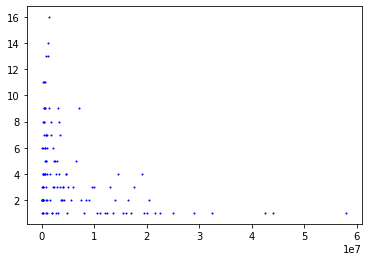

In [631]:
for i in np.unique(ys[0]):
    plt.scatter(i,np.sum(ys[0]==i),s=1,color='b')

(array([148., 207., 163.]),
 array([        0,    600000,   2500000, 150000000]),
 <a list of 3 Patch objects>)

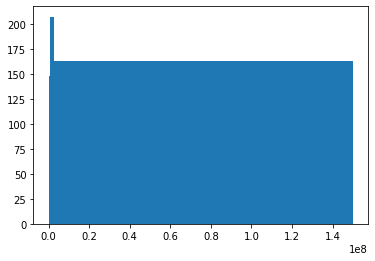

In [632]:
plt.hist(ys[1],bins=[0,600000,2500000,150000000])

(array([121., 149., 149.,  99.]),
 array([        0,    500000,   1250000,   5000000, 150000000]),
 <a list of 4 Patch objects>)

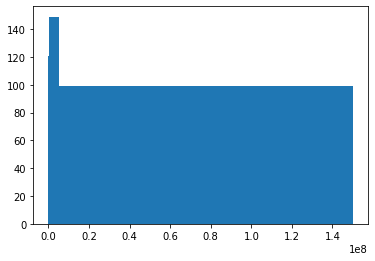

In [633]:
plt.hist(ys[1],bins=[0,500000,1250000,5000000,150000000])

(array([ 91., 127., 137., 105.,  58.]),
 array([        0,    400000,    900000,   2500000,  10000000, 150000000]),
 <a list of 5 Patch objects>)

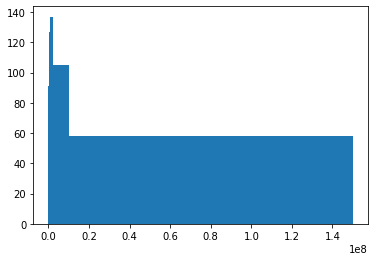

In [634]:
plt.hist(ys[1],bins=[0,400000,900000,2500000,10000000,150000000])

(array([ 64., 116.,  90., 101.,  80.,  67.]),
 array([        0,    300000,    700000,   1250000,   3000000,   8000000,
        150000000]),
 <a list of 6 Patch objects>)

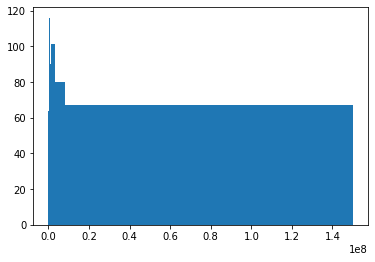

In [635]:
plt.hist(ys[1],bins=[0,300000,700000,1250000,3000000,8000000,150000000])

(array([ 52.,  96.,  83., 100.,  70.,  59.,  58.]),
 array([        0,    250000,    600000,   1000000,   2000000,   4000000,
         10000000, 150000000]),
 <a list of 7 Patch objects>)

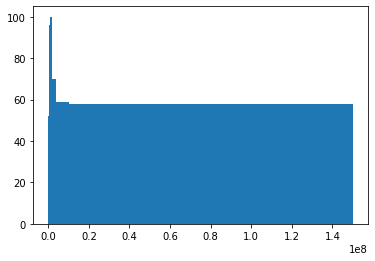

In [636]:
plt.hist(ys[1],bins=[0,250000,600000,1000000,2000000,4000000,10000000,150000000])

(array([39., 82., 80., 69., 74., 67., 49., 58.]),
 array([        0,    200000,    500000,    800000,   1250000,   2250000,
          4500000,  10000000, 150000000]),
 <a list of 8 Patch objects>)

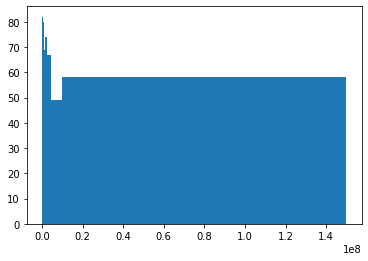

In [637]:
plt.hist(ys[1],bins=[0,200000,500000,800000,1250000,2250000,4500000,10000000,150000000])

In [638]:
# Below is the set of columns we care about

features = ['age'
            ,'height_cm'
           ,'weight_kg'
           ,'overall'
           ,'potential'
           ,'gk_diving'
           ,'gk_reflexes'
           ,'gk_handling'
           ,'gk_kicking'
           ,'gk_speed'
           ,'gk_positioning'
           ,'year'
           ,'league_ranking']

filtered_data = []
ys = []
for d in ndata_list3:
    filtered_data.append(d[features].fillna(0))
    ys.append(d['value_eur_next'].fillna(0))
filtered_data[0]

,age,height_cm,weight_kg,overall,potential,gk_diving,gk_reflexes,gk_handling,gk_kicking,gk_speed,gk_positioning,year,league_ranking
sofifa_id,,,,,,,,,,,,,
167495,28.0,193.0,92.0,90.0,90.0,87.0,86.0,85.0,92.0,60.0,90.0,0.0,1
192119,22.0,199.0,88.0,86.0,90.0,84.0,88.0,87.0,69.0,49.0,86.0,0.0,1
167948,27.0,188.0,78.0,85.0,86.0,86.0,88.0,81.0,71.0,64.0,81.0,0.0,1
168435,27.0,192.0,80.0,84.0,85.0,85.0,87.0,79.0,73.0,51.0,84.0,0.0,1
5479,33.0,185.0,84.0,84.0,84.0,87.0,88.0,79.0,67.0,64.0,79.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212763,19.0,179.0,76.0,53.0,64.0,54.0,55.0,52.0,49.0,51.0,52.0,0.0,4
201354,21.0,186.0,81.0,53.0,62.0,50.0,58.0,50.0,48.0,46.0,52.0,0.0,4
222070,23.0,191.0,92.0,51.0,58.0,56.0,55.0,49.0,52.0,44.0,43.0,0.0,1


In [639]:
num_bins = range(3,9)
bins_try= [[0,600000,2500000,150000000],[0,500000,1250000,5000000,150000000],[0,400000,900000,2500000,10000000,150000000],
           [0,300000,700000,1250000,3000000,8000000,150000000],[0,250000,600000,1000000,2000000,4000000,10000000,150000000],
          [0,200000,500000,800000,1250000,2250000,4500000,10000000,150000000]]

In [640]:
import copy
ys_bins1 = copy.deepcopy(ys) #3
ys_bins2 = copy.deepcopy(ys) #4
ys_bins3 = copy.deepcopy(ys) #5
ys_bins4 = copy.deepcopy(ys) #6
ys_bins5 = copy.deepcopy(ys) #7
ys_bins6 = copy.deepcopy(ys) #8
ys_bins = [ys_bins1,ys_bins2,ys_bins3,ys_bins4,ys_bins5,ys_bins6]
for h in range(len(ys_bins)):
    for i in range(len(ys_bins[h])):
        for j in ys_bins[h][i].index:
            for k, l in enumerate(bins_try[h]):
                if l >= ys_bins[h][i][j]:
                    ys_bins[h][i][j] = k
                    break

In [641]:
n = len(filtered_data[0])
t1 = int(0.65*n)
t2 = int(0.8*n)
index_shuffle = np.array(filtered_data[0].index)
np.random.shuffle(index_shuffle)

train_x = filtered_data[0].loc[index_shuffle[0:t1]]
validate_x = filtered_data[0].loc[index_shuffle[t1:t2]]
test_x = filtered_data[0].loc[index_shuffle[t2:n]]

train_y = ys_bins[0][0].loc[index_shuffle[0:t1]]
validate_y = ys_bins[0][0].loc[index_shuffle[t1:t2]]
test_y = ys_bins[0][0].loc[index_shuffle[t2:n]]

In [642]:
train_y = [[],[],[],[],[],[]]
validate_y = [[],[],[],[],[],[]]
test_y = [[],[],[],[],[],[]]
for i in range(len(filtered_data)):
    n = len(filtered_data[i])
    t1 = int(0.65*n)
    t2 = int(0.8*n)
    index_shuffle = np.array(filtered_data[i].index)
    np.random.shuffle(index_shuffle)

    train_x_i = filtered_data[i].loc[index_shuffle[0:t1]]
    validate_x_i = filtered_data[i].loc[index_shuffle[t1:t2]]
    test_x_i = filtered_data[i].loc[index_shuffle[t2:n]]
    if i == 0:
        train_x = train_x_i
        validate_x = validate_x_i
        test_x = test_x_i
    else:
        train_x = train_x.append(train_x_i)
        validate_x = validate_x.append(validate_x_i)
        test_x = test_x.append(test_x_i)
    for j in range(len(ys_bins)):
        train_y_i = ys_bins[j][i].loc[index_shuffle[0:t1]]
        validate_y_i = ys_bins[j][i].loc[index_shuffle[t1:t2]]
        test_y_i = ys_bins[j][i].loc[index_shuffle[t2:n]]
        if i == 0:
            train_y[j] = train_y_i
            validate_y[j] = validate_y_i
            test_y[j] = test_y_i
        else:
            train_y[j] = train_y[j].append(train_y_i)
            validate_y[j] = validate_y[j].append(validate_y_i)
            test_y[j] = test_y[j].append(test_y_i)

In [643]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_depth = range(3,16)
correct = [[],[],[],[],[],[]]
for h in range(len(ys_bins)):
    for i in tree_depth:
        decision_tree = DecisionTreeClassifier(max_depth = i).fit(train_x,train_y[h])
        correct[h].append(np.sum(decision_tree.predict(validate_x)==validate_y[h])/len(validate_y[h]))
pd.DataFrame(data=np.array(correct), columns = np.array(tree_depth),index =num_bins)

,3,4,5,6,7,8,9,10,11,12,13,14,15
3,0.741127,0.713987,0.747390,0.753653,0.751566,0.757829,0.755741,0.720251,0.722338,0.713987,0.707724,0.720251,0.718163
4,0.709812,0.705637,0.699374,0.701461,0.691023,0.674322,0.663883,0.651357,0.647182,0.659708,0.640919,0.640919,0.626305
5,0.553236,0.607516,0.615866,0.605428,0.597077,0.599165,0.567850,0.553236,0.567850,0.544885,0.546973,0.538622,0.549061
6,0.492693,0.542797,0.557411,0.561587,0.532359,0.538622,0.530271,0.542797,0.557411,0.544885,0.519833,0.515658,0.515658
7,0.444676,0.471816,0.486430,0.490605,0.507307,0.488518,0.501044,0.473904,0.453027,0.473904,0.473904,0.482255,0.467641
8,0.363257,0.423800,0.444676,0.457203,0.463466,0.461378,0.417537,0.390397,0.398747,0.415449,0.402923,0.407098,0.390397


In [644]:
from sklearn.ensemble import BaggingClassifier
tree_depth = range(3,16)
correct = [[],[],[],[],[],[]]
for h in range(len(ys_bins)):
    for i in tree_depth:
        bag_class = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = i),n_estimators=1000,
                          max_samples = 20, random_state=11)
        output = bag_class.fit(train_x,train_y[h])
        correct[h].append(np.sum(output.predict(validate_x)==validate_y[h])/len(validate_y[h]))
pd.DataFrame(data=np.array(correct), columns = np.array(tree_depth),index =num_bins)

,3,4,5,6,7,8,9,10,11,12,13,14,15
3,0.764092,0.766180,0.768267,0.768267,0.768267,0.768267,0.768267,0.768267,0.768267,0.768267,0.768267,0.768267,0.768267
4,0.670146,0.680585,0.682672,0.680585,0.680585,0.680585,0.680585,0.680585,0.680585,0.680585,0.680585,0.680585,0.680585
5,0.605428,0.611691,0.613779,0.617954,0.615866,0.615866,0.615866,0.615866,0.615866,0.615866,0.615866,0.615866,0.615866
6,0.521921,0.519833,0.519833,0.519833,0.519833,0.519833,0.519833,0.519833,0.519833,0.519833,0.519833,0.519833,0.519833
7,0.494781,0.503132,0.517745,0.519833,0.517745,0.515658,0.515658,0.515658,0.515658,0.515658,0.515658,0.515658,0.515658
8,0.413361,0.419624,0.419624,0.423800,0.419624,0.419624,0.419624,0.419624,0.419624,0.419624,0.419624,0.419624,0.419624


In [645]:
for i in range(5):
    print('from {} to {}:'.format(i+3,i+4),np.max(np.array(correct)[i,])-np.max(np.array(correct)[i + 1,]),'decrease')

from 3 to 4: 0.08559498956158662 decrease
from 4 to 5: 0.06471816283924847 decrease
from 5 to 6: 0.09603340292275564 decrease
from 6 to 7: 0.002087682672233915 decrease
from 7 to 8: 0.0960334029227557 decrease


Based on this output we choose to fit on 5 bins as we see 9.4% decrease in accuracy from 5 to 6 bins in the best performing max tree depth while still giving us as many bins as we can get since we want as many as we can get while still predicting fairly accurately. At 5 bins we will choose a max depth of 6 as this produces the largest correct prediction rate at 59.5% for the valdiation set.

In [646]:
bag_class = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 6),n_estimators=1000,
                          max_samples = 20, random_state=9)
output = bag_class.fit(train_x,train_y[2])
np.sum(output.predict(test_x)==test_y[2])/len(test_y[2])

0.6349453978159126

We attained a 63.5% correct prediction rate using 5 bins and max depth of 6

Text(0.5, 1.0, 'Histogram of the difference of expected - true value')

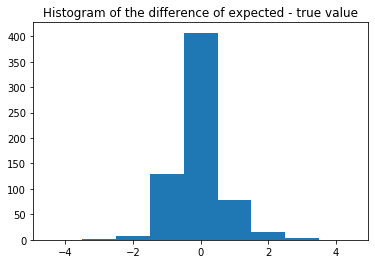

In [647]:
plt.hist(output.predict(test_x)-test_y[2],bins=[-4.5,-3.5,-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5,4.5])
plt.title('Histogram of the difference of expected - true value')

# KNN Goalkeepers

In [648]:
# Below is the set of columns we care about

features = ['age'
            ,'height_cm'
           ,'weight_kg'
           ,'overall'
           ,'potential'
           ,'gk_diving'
           ,'gk_reflexes'
           ,'gk_handling'
           ,'gk_kicking'
           ,'gk_speed'
           ,'gk_positioning'
           ,'year'
           ,'league_ranking']


gk_data = []
y_gk = []
for d in ndata_list3:
    gk_data.append(d[features].fillna(0))
    y_gk.append(d['value_eur_next'].fillna(0))
    
gk_data[0],y_gk[0]

(            age  height_cm  weight_kg  overall  potential  gk_diving  \
 sofifa_id                                                              
 167495     28.0      193.0       92.0     90.0       90.0       87.0   
 192119     22.0      199.0       88.0     86.0       90.0       84.0   
 167948     27.0      188.0       78.0     85.0       86.0       86.0   
 168435     27.0      192.0       80.0     84.0       85.0       85.0   
 5479       33.0      185.0       84.0     84.0       84.0       87.0   
 ...         ...        ...        ...      ...        ...        ...   
 212763     19.0      179.0       76.0     53.0       64.0       54.0   
 201354     21.0      186.0       81.0     53.0       62.0       50.0   
 222070     23.0      191.0       92.0     51.0       58.0       56.0   
 192544     25.0      185.0       85.0     51.0       55.0       51.0   
 194372     24.0      191.0       83.0     43.0       49.0       40.0   
 
            gk_reflexes  gk_handling  gk_kicking 

In [649]:
for i in range(len(gk_data)):
    n = len(gk_data[i])
    t1 = int(0.65*n)
    t2 = int(0.8*n)
    index_shuffle = np.array(gk_data[i].index)
    np.random.shuffle(index_shuffle)

    train_x_i = gk_data[i].loc[index_shuffle[0:t1]]
    validate_x_i = gk_data[i].loc[index_shuffle[t1:t2]]
    test_x_i = gk_data[i].loc[index_shuffle[t2:n]]

    train_y_i = y_gk[i].loc[index_shuffle[0:t1]]
    validate_y_i = y_gk[i].loc[index_shuffle[t1:t2]]
    test_y_i = y_gk[i].loc[index_shuffle[t2:n]]
    
    train_log_y_i = np.log(train_y_i)
    validate_log_y_i = np.log(validate_y_i)
    test_log_y_i = np.log(test_y_i)
    train_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    validate_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    test_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    if i == 0:
        train_x = train_x_i
        validate_x = validate_x_i
        test_x = test_x_i
        train_y = train_y_i
        validate_y = validate_y_i
        test_y = test_y_i        
        train_log_y = train_log_y_i
        validate_log_y = validate_log_y_i
        test_log_y = test_log_y_i  
    else:
        train_x = train_x.append(train_x_i)
        validate_x = validate_x.append(validate_x_i)
        test_x = test_x.append(test_x_i)
        train_y = train_y.append(train_y_i)
        validate_y = validate_y.append(validate_y_i)
        test_y = test_y.append(test_y_i)        
        train_log_y = train_log_y.append(train_log_y_i)
        validate_log_y = validate_log_y.append(validate_log_y_i)
        test_log_y = test_log_y.append(test_log_y_i)

In [650]:
print(train_x,test_log_y)

            age  height_cm  weight_kg  overall  potential  gk_diving  \
sofifa_id                                                              
203835     31.0      197.0       94.0     69.0       69.0       67.0   
163264     28.0      188.0       86.0     72.0       72.0       73.0   
223071     28.0      198.0       96.0     65.0       65.0       67.0   
200715     21.0      191.0       80.0     60.0       68.0       61.0   
183347     25.0      192.0       80.0     59.0       65.0       59.0   
...         ...        ...        ...      ...        ...        ...   
167948     32.0      188.0       82.0     88.0       88.0       89.0   
225280     22.0      188.0       76.0     58.0       70.0       64.0   
188400     26.0      190.0       80.0     74.0       77.0       73.0   
230694     24.0      197.0       82.0     64.0       68.0       63.0   
204354     26.0      188.0       82.0     65.0       70.0       66.0   

           gk_reflexes  gk_handling  gk_kicking  gk_speed  gk_p

In [651]:
from sklearn.neighbors import KNeighborsClassifier

abs_list = []
mse_list = []
i_list= []
for i in range(0,100,2):
    i_list.append((i%10)*10 + (i**2//11) + 5)
i_list

for i in i_list:
    classifier = KNeighborsClassifier(n_neighbors=i, metric="manhattan", p=1)
    classifier.fit(train_x, train_y)
    pred_y = classifier.predict(validate_x)
    mse_list.append(np.mean((validate_y - (np.array(pred_y).reshape(len(pred_y),)))**2))
    abs_list.append(np.mean(np.abs(validate_y - (np.array(pred_y).reshape(len(pred_y),)))))

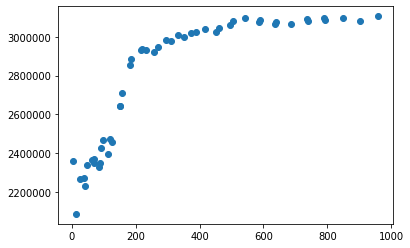

In [652]:
plt.scatter(i_list,abs_list)

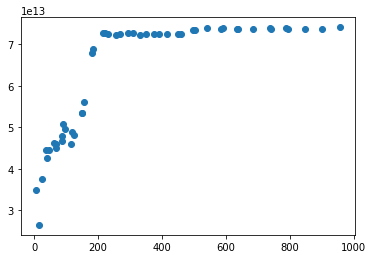

In [653]:
plt.scatter(i_list,mse_list)

In [654]:
k = i_list[np.argmin(abs_list)]
classifier = KNeighborsClassifier(n_neighbors=k, metric="manhattan", p=1)
classifier.fit(train_x, train_y)
pred_y = classifier.predict(test_x)
print(k, np.mean(np.abs(test_y - (np.array(pred_y).reshape(len(pred_y),)))))

14 1985561.6224648985


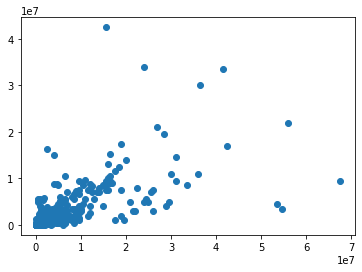

In [655]:
plt.scatter(test_y,np.abs(test_y - (np.array(pred_y).reshape(len(pred_y),))))

In [656]:
k = i_list[np.argmin(mse_list)]
classifier = KNeighborsClassifier(n_neighbors=k, metric="manhattan", p=1)
classifier.fit(train_x, train_y)
pred_y = classifier.predict(test_x)
print(k, np.mean((test_y - (np.array(pred_y).reshape(len(pred_y),)))**2))

14 20134885062402.496


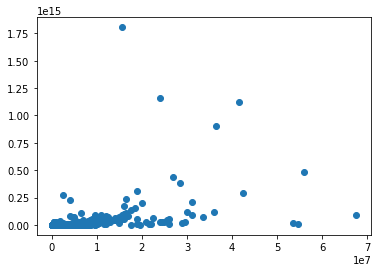

In [657]:
plt.scatter(test_y,(test_y - (np.array(pred_y).reshape(len(pred_y),)))**2)

# KNN Outfield

In [658]:
features = ['age'
            ,'height_cm'
           ,'weight_kg'
           ,'overall'
           ,'potential'
           ,'pace'
           ,'shooting'
           ,'passing'
           ,'defending'
           ,'dribbling'
           ,'physic'
           ,'year'
           ,'league_ranking']

outfield_data = []
y_out = []
for d in ndata_list2:
    outfield_data.append(d[features].fillna(0))
    y_out.append(d['value_eur_next'].fillna(0))
outfield_data[0]

,age,height_cm,weight_kg,overall,potential,pace,shooting,passing,defending,dribbling,physic,year,league_ranking
sofifa_id,,,,,,,,,,,,,
158023,27.0,169.0,67.0,93.0,95.0,93.0,89.0,86.0,27.0,96.0,63.0,0.0,1
20801,29.0,185.0,80.0,92.0,92.0,93.0,93.0,81.0,32.0,91.0,79.0,0.0,1
9014,30.0,180.0,80.0,90.0,90.0,93.0,86.0,83.0,32.0,92.0,64.0,0.0,1
41236,32.0,195.0,95.0,90.0,90.0,76.0,91.0,81.0,34.0,86.0,86.0,0.0,1
176580,27.0,181.0,81.0,89.0,91.0,83.0,87.0,79.0,42.0,88.0,79.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222997,18.0,174.0,70.0,42.0,54.0,46.0,32.0,42.0,32.0,45.0,47.0,0.0,2
220806,17.0,187.0,81.0,41.0,61.0,66.0,25.0,29.0,39.0,30.0,53.0,0.0,4
225509,17.0,178.0,57.0,41.0,50.0,64.0,41.0,27.0,27.0,35.0,41.0,0.0,4


In [659]:
for i in range(len(outfield_data)):
    n = len(outfield_data[i])
    t1 = int(0.65*n)
    t2 = int(0.8*n)
    index_shuffle = np.array(outfield_data[i].index)
    np.random.shuffle(index_shuffle)

    train_x_i = outfield_data[i].loc[index_shuffle[0:t1]]
    validate_x_i = outfield_data[i].loc[index_shuffle[t1:t2]]
    test_x_i = outfield_data[i].loc[index_shuffle[t2:n]]

    train_y_i = y_out[i].loc[index_shuffle[0:t1]]
    validate_y_i = y_out[i].loc[index_shuffle[t1:t2]]
    test_y_i = y_out[i].loc[index_shuffle[t2:n]]
    
    train_log_y_i = np.log(train_y_i)
    validate_log_y_i = np.log(validate_y_i)
    test_log_y_i = np.log(test_y_i)
    train_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    validate_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    test_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    if i == 0:
        train_x = train_x_i
        validate_x = validate_x_i
        test_x = test_x_i
        train_y = train_y_i
        validate_y = validate_y_i
        test_y = test_y_i        
        train_log_y = train_log_y_i
        validate_log_y = validate_log_y_i
        test_log_y = test_log_y_i  
    else:
        train_x = train_x.append(train_x_i)
        validate_x = validate_x.append(validate_x_i)
        test_x = test_x.append(test_x_i)
        train_y = train_y.append(train_y_i)
        validate_y = validate_y.append(validate_y_i)
        test_y = test_y.append(test_y_i)        
        train_log_y = train_log_y.append(train_log_y_i)
        validate_log_y = validate_log_y.append(validate_log_y_i)
        test_log_y = test_log_y.append(test_log_y_i)

In [660]:
from sklearn.neighbors import KNeighborsClassifier

abs_list = []
mse_list = []
i_list= []
for i in range(0,100,2):
    i_list.append((i%10)*10 + 10*(i**2//10) + 10)

for i in i_list:
    classifier = KNeighborsClassifier(n_neighbors=i, metric="manhattan", p=1)
    classifier.fit(train_x, train_y)
    pred_y = classifier.predict(validate_x)
    mse_list.append(np.mean((validate_y - (np.array(pred_y).reshape(len(pred_y),)))**2))
    abs_list.append(np.mean(np.abs(validate_y - (np.array(pred_y).reshape(len(pred_y),)))))

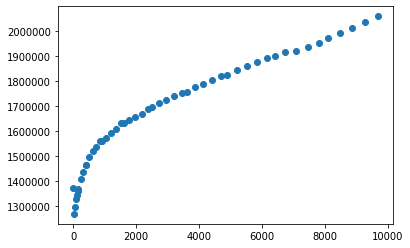

In [661]:
plt.scatter(i_list,abs_list)

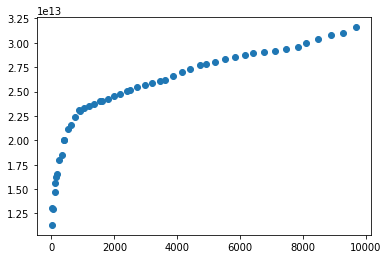

In [662]:
plt.scatter(i_list,mse_list)

In [663]:
k = i_list[np.argmin(abs_list)]
classifier = KNeighborsClassifier(n_neighbors=k, metric="manhattan", p=1)
classifier.fit(train_x, train_y)
pred_y = classifier.predict(test_x)
print(k, np.mean(np.abs(test_y - (np.array(pred_y).reshape(len(pred_y),)))))

30 1310464.298401421


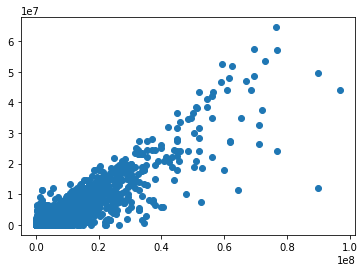

In [664]:
plt.scatter(test_y,np.abs(test_y - (np.array(pred_y).reshape(len(pred_y),))))

In [665]:
k = i_list[np.argmin(mse_list)]
classifier = KNeighborsClassifier(n_neighbors=k, metric="manhattan", p=1)
classifier.fit(train_x, train_y)
pred_y = classifier.predict(test_x)
print(k, np.mean((test_y - (np.array(pred_y).reshape(len(pred_y),)))**2))

30 12408454928952.043


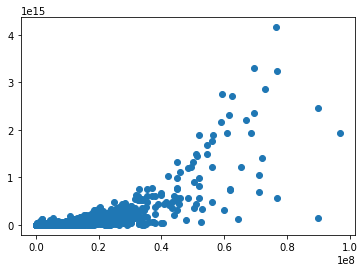

In [666]:
plt.scatter(test_y,(test_y - (np.array(pred_y).reshape(len(pred_y),)))**2)